# Gradient Descent

This notebook explores the gradient descent algorithm on various synthetic data.

*Note: variable names are reused, so it's best to run all cells to avoid nonsensical plots.*

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [134]:
class Metadata:
	def __init__(self, path, initial_guess, convergence_delta, it, max_iter):
		self.path = path
		self.initial_guess = initial_guess
		self.convergence_delta = convergence_delta
		self.max_iter = max_iter
		self.iter = it

	def __str__(self):
		return f"{self.initial_guess = }\n" \
			+ f"{self.convergence_delta = }\n" \
			+ f"{self.iter = }\n" \
			+ f"{self.max_iter = }"


def gradient_descent(data, gradient_function, learning_rate, initial_guess = None, convergence_delta = 0.00001, max_iter = 10000):
	theta, _ = gradient_descent_extra_data(data, gradient_function, learning_rate, initial_guess, convergence_delta, max_iter)
	return theta


def gradient_descent_extra_data(data, gradient_function, learning_rate, initial_guess = None, convergence_delta = 0.00001, max_iter = 10000):
	if initial_guess == None:
		mins = np.min(data, axis=0)
		maxs = np.max(data, axis=0)
		initial_guess = np.atleast_1d(np.random.uniform(mins, maxs))

	initial_guess = np.atleast_1d(initial_guess)
	prev_theta = initial_guess
	theta = initial_guess

	path = []
	path.append(theta)

	n_iter = 0
	while True:
		prev_theta = theta
		theta = prev_theta - learning_rate * gradient_function(prev_theta)
		path.append(theta)
		n_iter += 1

		if np.sum(np.abs(prev_theta - theta)) <= convergence_delta or n_iter >= max_iter:
			break

	return theta, Metadata(np.array(path), initial_guess, convergence_delta, n_iter, max_iter)

In [135]:
def plot_2D(minimum, metadata, caption):
	path = metadata.path
	initial_guess = metadata.initial_guess


	plt.plot(x, y, label="Objective function")
	plt.plot(path, f(path), marker='x', markersize=4, linestyle='-', color='black', label="Convergence chain")
	plt.plot(path[0], f(path[0]), marker='o', markersize=8, color='forestgreen', label="Initial guess")
	plt.plot(minimum, f(minimum), 'ro', markersize=8, label="Gradient descent result")

	plt.text(minimum, 0.4 * np.max(y), f"{minimum[0]}", fontsize=9, ha='center', color='r')
	plt.text(minimum, 0.5 * np.max(y), f"{initial_guess[0]}", fontsize=9, ha='center', color='forestgreen')

	plt.rcParams["figure.figsize"] = (12,6)
	plt.legend()
	plt.title(caption)
	plt.show()

	print(metadata)


def plot_3D(minimum, metadata, caption, rotation = None):
	path = metadata.path
	initial_guess = metadata.initial_guess

	path_X, path_Y = np.meshgrid(path[:, 0], path[:, 1])
	path_Z = f(path_X, path_Y)


	fig = plt.figure(figsize=(16, 12))
	ax = fig.add_subplot(111, projection='3d')

	ax.plot_surface(X, Y, Z, label="Objective function", cmap='coolwarm', alpha=0.5)

	plt.plot(path[:, 0], path[:, 1], f(path[:, 0], path[:, 1]), marker='x', markersize=4, linestyle='-', color='black', label="Convergence chain")
	plt.plot(path[0][0], path[0][1], f(path[0][0], path[0][1]), marker='o', markersize=8, color='forestgreen', label="Initial guess")
	plt.plot(minimum[0], minimum[1], f(minimum[0], minimum[1]), 'ro', markersize=8, label="Gradient descent result")

	ax.text2D(0.1, 0.90, f"{minimum}, Z = {f(minimum[0], minimum[1])}", fontsize=9, ha='center', color='r', transform=ax.transAxes)
	ax.text2D(0.1, 0.95, f"{initial_guess}, Z = {f(initial_guess[0], initial_guess[1])}", fontsize=9, ha='center', color='forestgreen', transform=ax.transAxes)

	if rotation:
		azim = rotation[0]
		elev = rotation[1]
		ax.view_init(azim=azim, elev=elev)

	ax.set_xlabel("X")
	ax.set_ylabel("Y")
	ax.set_zlabel("Z")
	plt.legend()
	plt.title(caption)
	plt.show()

	print(metadata)

In [136]:
x = np.arange(-10, 10, 0.01)

## Parabola

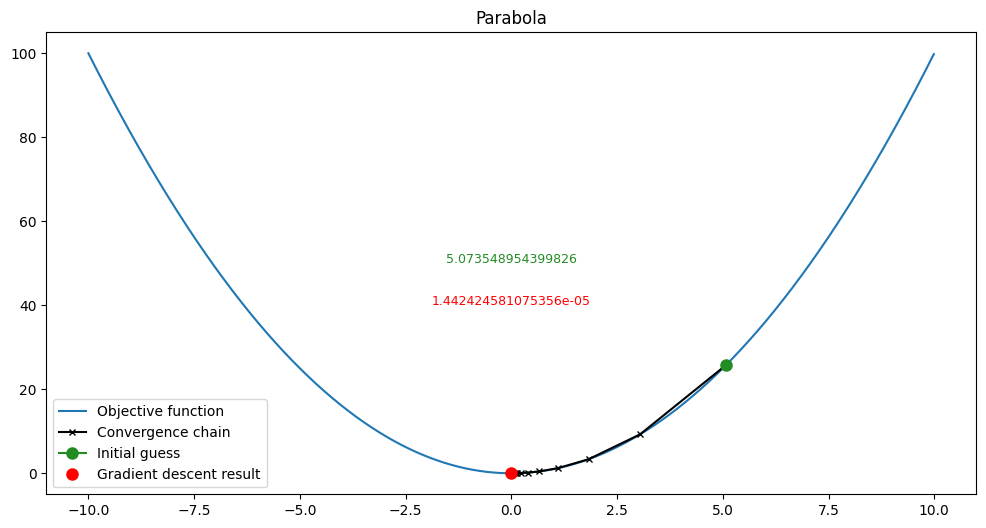

self.initial_guess = array([5.07354895])
self.convergence_delta = 1e-05
self.iter = 25
self.max_iter = 10000


In [137]:
def f(x):
	return np.pow(x, 2)

def f_prime(point):
	return np.array([2 * point[0]])

y = f(x)
learning_rate = 0.2
minimum, metadata = gradient_descent_extra_data(x, f_prime, learning_rate)

plot_2D(minimum, metadata, "Parabola")

## Sinusoid

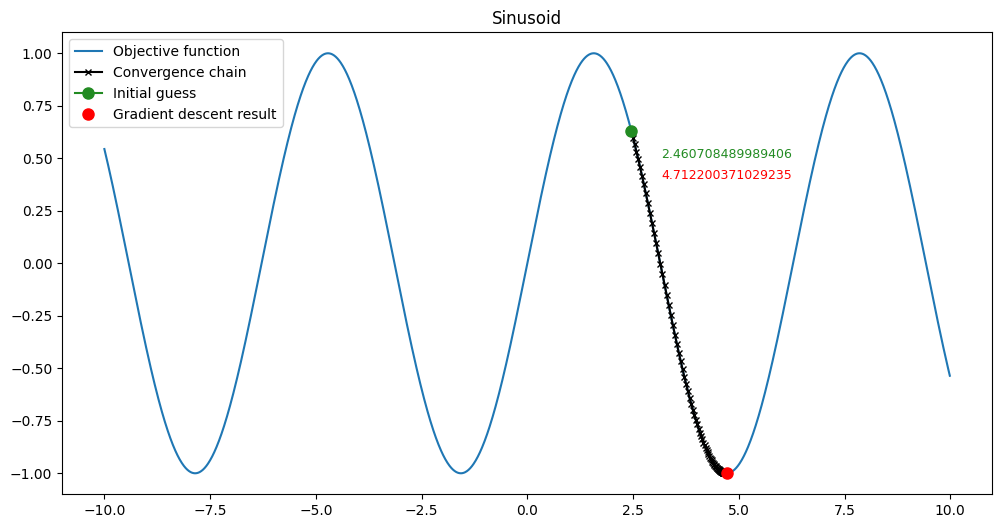

self.initial_guess = array([2.46070849])
self.convergence_delta = 1e-05
self.iter = 196
self.max_iter = 10000


In [138]:
def f(x):
	return np.sin(x)

def f_prime(point):
	return np.cos(point)

y = f(x)
learning_rate = 0.05
minimum, metadata = gradient_descent_extra_data(x, f_prime, learning_rate)

plot_2D(minimum, metadata, "Sinusoid")

## Exponential function

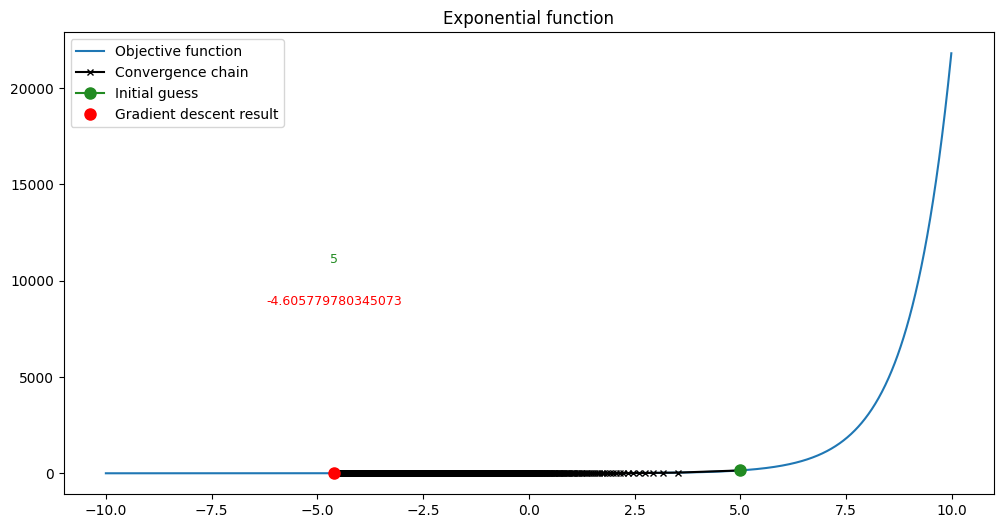

self.initial_guess = array([5])
self.convergence_delta = 1e-05
self.iter = 10000
self.max_iter = 10000


In [139]:
def f(x):
	return np.exp(x)

def f_prime(point):
	return np.exp(point)

y = f(x)
learning_rate = 0.01
minimum, metadata = gradient_descent_extra_data(x, f_prime, learning_rate, initial_guess=5)

plot_2D(minimum, metadata, "Exponential function")

## Paraboloid in 3D

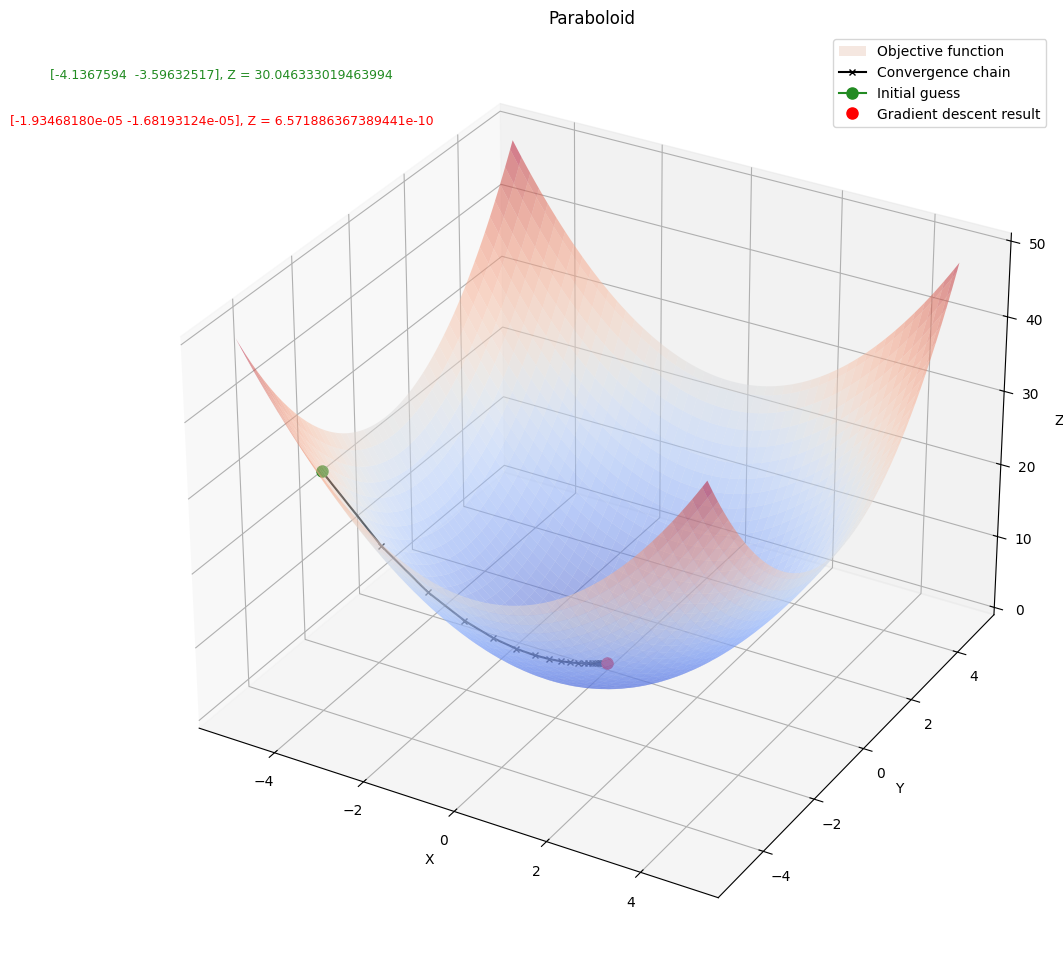

self.initial_guess = array([-4.1367594 , -3.59632517])
self.convergence_delta = 1e-05
self.iter = 55
self.max_iter = 200


In [140]:
def f(x, y):
	return x**2 + y**2

def f_prime(point):
	return np.array([2 * point[0], 2 * point[1]])

x  = np.arange(-5, 5, 0.1)
y  = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

data = np.stack((x, y), axis=1)

learning_rate = 0.1
minimum, metadata = gradient_descent_extra_data(data, f_prime, learning_rate, max_iter=200)

plot_3D(minimum, metadata, "Paraboloid")

## Rosenbrock function

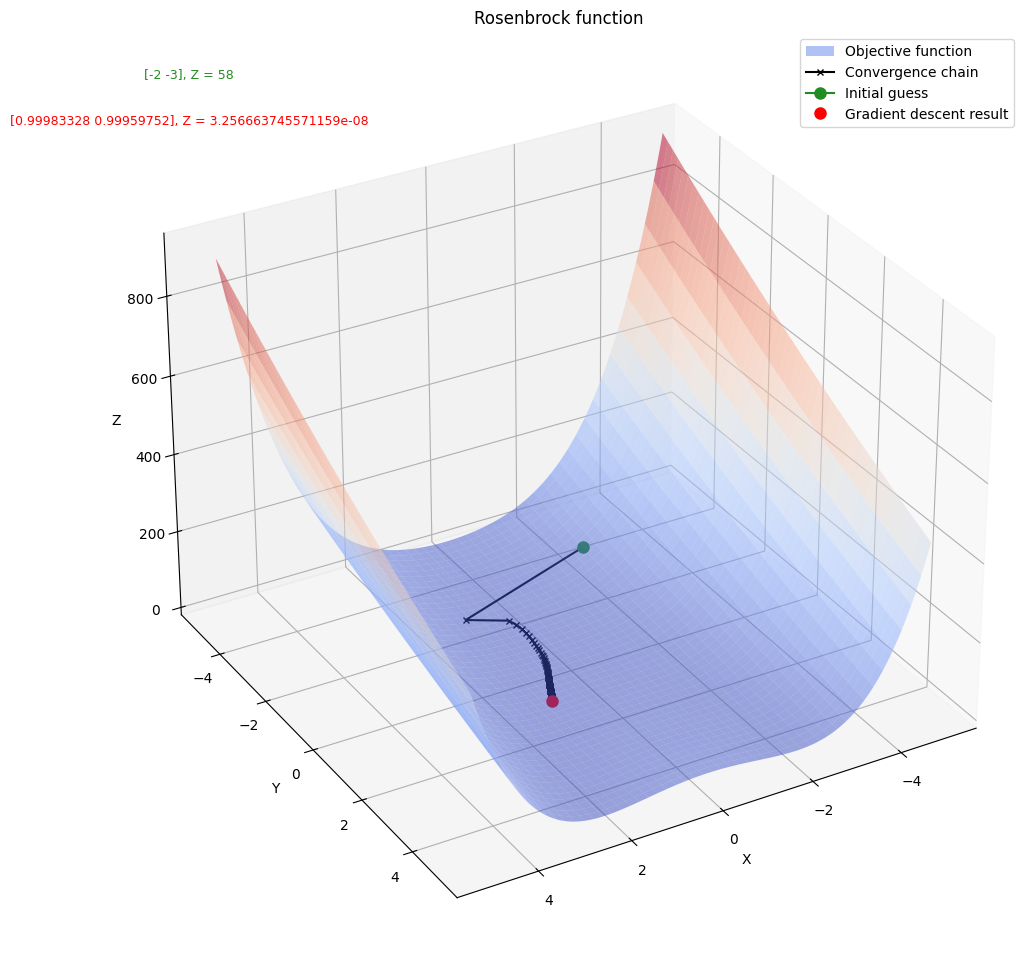

self.initial_guess = array([-2, -3])
self.convergence_delta = 1e-05
self.iter = 452
self.max_iter = 1000


In [141]:
def f(x, y):
	a = 1
	b = 1
	return (a - x)**2 + b * (y - x**2)**2

def f_prime(point):
	a = 1
	b = 1
	x = point[0]
	y = point[1]

	return np.array([
		2 * (x - a) + 4 * b * x * (x**2 - y), 
		2 * b * (y - x**2)
	])

x  = np.arange(-5, 5, 0.01)
y  = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

data = np.stack((x, y), axis=1)

learning_rate = 0.05
minimum, metadata = gradient_descent_extra_data(data, f_prime, learning_rate, initial_guess=[-2, -3], max_iter=1000)

plot_3D(minimum, metadata, "Rosenbrock function", rotation=(60, 30))

## Himmelblau's function

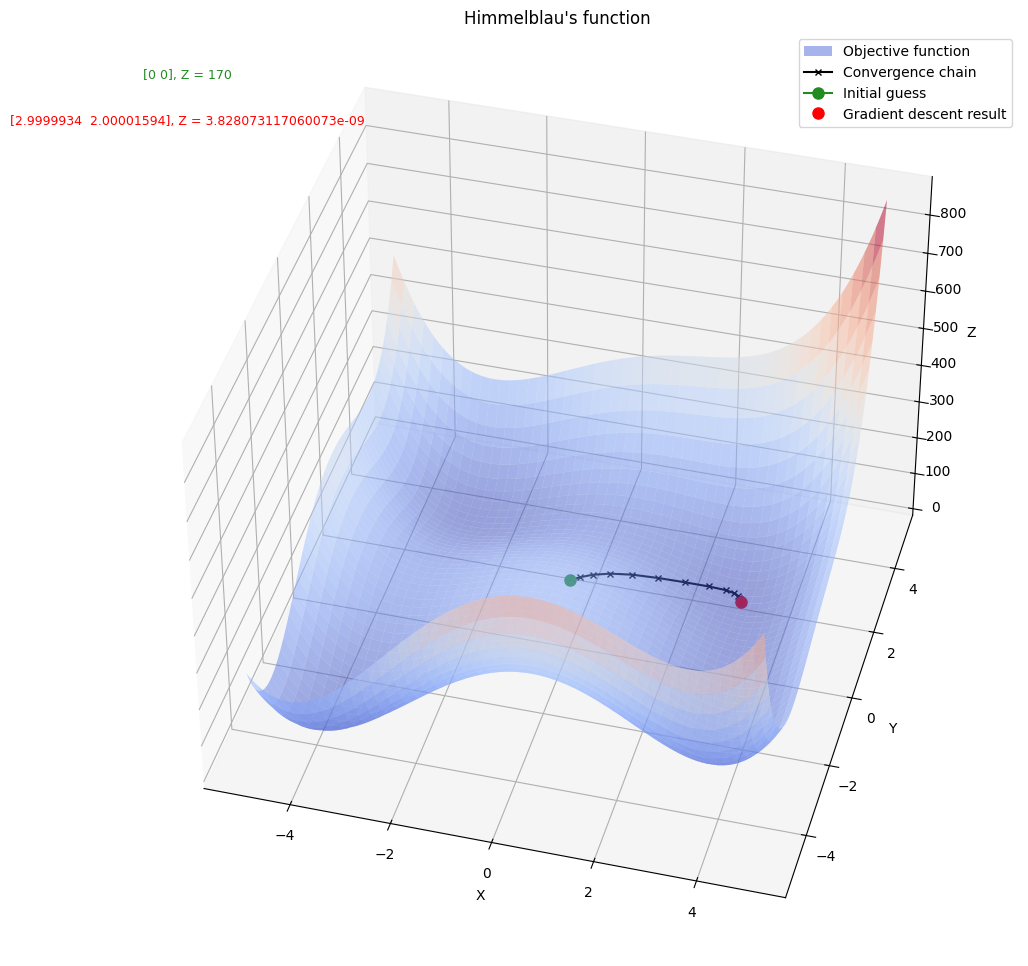

self.initial_guess = array([0, 0])
self.convergence_delta = 1e-05
self.iter = 41
self.max_iter = 1000


In [142]:
clip_value = 1_000_000

def f(x, y):
	result = (x**2 + y - 11)**2 + (x + y**2 - 7)**2 
	return np.clip(result, -clip_value, clip_value)

def f_prime(point):
	x = point[0]
	y = point[1]

	result = np.array([
		2 * (2 * x * (x**2 + y - 11) + x + y**2 - 7), 
		2 * (x**2 + 2 * y * (x + y**2 - 7) + y - 11)
	])

	return np.clip(result, -clip_value, clip_value)

x  = np.arange(-5, 5, 0.01)
y  = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

data = np.stack((x, y), axis=1)

learning_rate = 0.01
minimum, metadata = gradient_descent_extra_data(data, f_prime, learning_rate, initial_guess=[0, 0], max_iter=1000)

plot_3D(minimum, metadata, "Himmelblau's function", rotation=(285, 40))

## Multidimensional Rosenbrock function

In [143]:
def f(x):
	N = len(x)
	return sum(100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(N - 1))

def f_prime(point):
	N = len(point)
	grad = np.zeros(N)
	for i in range(N):
		if i < N - 1:
			grad[i] += -2 * (1 - point[i]) - 400 * point[i] * (point[i+1] - point[i]**2)
		if i > 0:
			grad[i] += 200 * (point[i] - point[i-1]**2)
	return grad

N = 4
x = [np.arange(-1, 1, 0.01) for i in range(N)]
f = f(x)

data = np.stack(x, axis=1)

learning_rate = 0.0001
minimum, metadata = gradient_descent_extra_data(data, f_prime, learning_rate, initial_guess=[-0.5, -0.5, -1, 1.3], max_iter=50000)

print(minimum)
print(metadata)

[0.98711608 0.97435074 0.94923914 0.90079592]
self.initial_guess = array([-0.5, -0.5, -1. ,  1.3])
self.convergence_delta = 1e-05
self.iter = 42833
self.max_iter = 50000
